In [1]:
import cv2
import numpy as np
import imutils
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
from utils.imageutils import crop, displayImage, calculatePixelDistance, calculateSize
from utils.cttutils import calibrateCamerasForVolumeWeight, getDimensions, getCameraCalibrationValues
from utils.calibrateutils import calculatePpm, getCameraParameters

## Calibrate

In [2]:
vals = calibrateCamerasForVolumeWeight()
side_b, side_m, top_b, top_m = vals
print(vals)

(31.604346932840222, -0.028799679334061277, 17.945023426119622, 0.001293059106966016)


In [3]:
vals2 = getCameraCalibrationValues()
print(vals2)

(31.604346932840222, -0.028799679334061277, 17.945023426119622, 0.001293059106966016)


In [3]:
side_params, top_params = getCameraParameters()

In [4]:
print (top_params)

{'width': 1050, 'height': 1300, 'startX': 500, 'startY': 400, 'th': 35}


## Measure

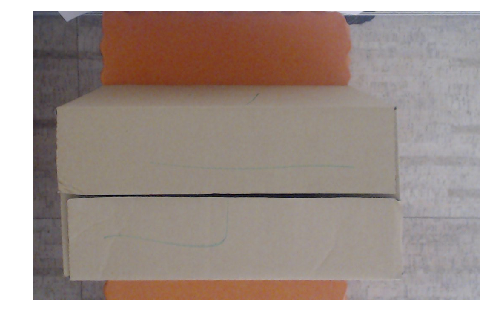

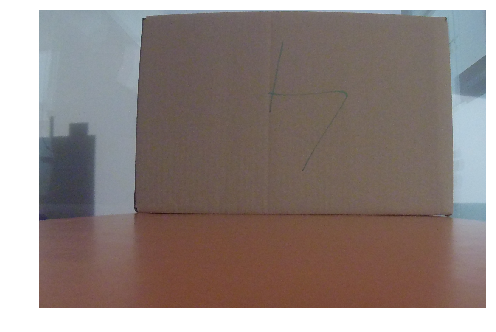

In [5]:
bg_side = cv2.imread("resources/calibrationImages/bg_side.jpg")
side = cv2.imread("resources/volumeImages/side4.jpg")
bg_top = cv2.imread("resources/calibrationImages/bg_top.jpg")
top = cv2.imread("resources/volumeImages/top4.jpg")

top = imutils.rotate(top,180)
bg_top = imutils.rotate(bg_top, 180)


side = crop(side, side_params['width'], side_params['height'], side_params['startX'], side_params['startY'])
bg_side = crop(bg_side, side_params['width'], side_params['height'], side_params['startX'], side_params['startY'])

top = crop(top, top_params['width'], top_params['height'], top_params['startX'], top_params['startY'])
bg_top = crop(bg_top, top_params['width'], top_params['height'], top_params['startX'], top_params['startY'])

displayImage(top)
displayImage(side)

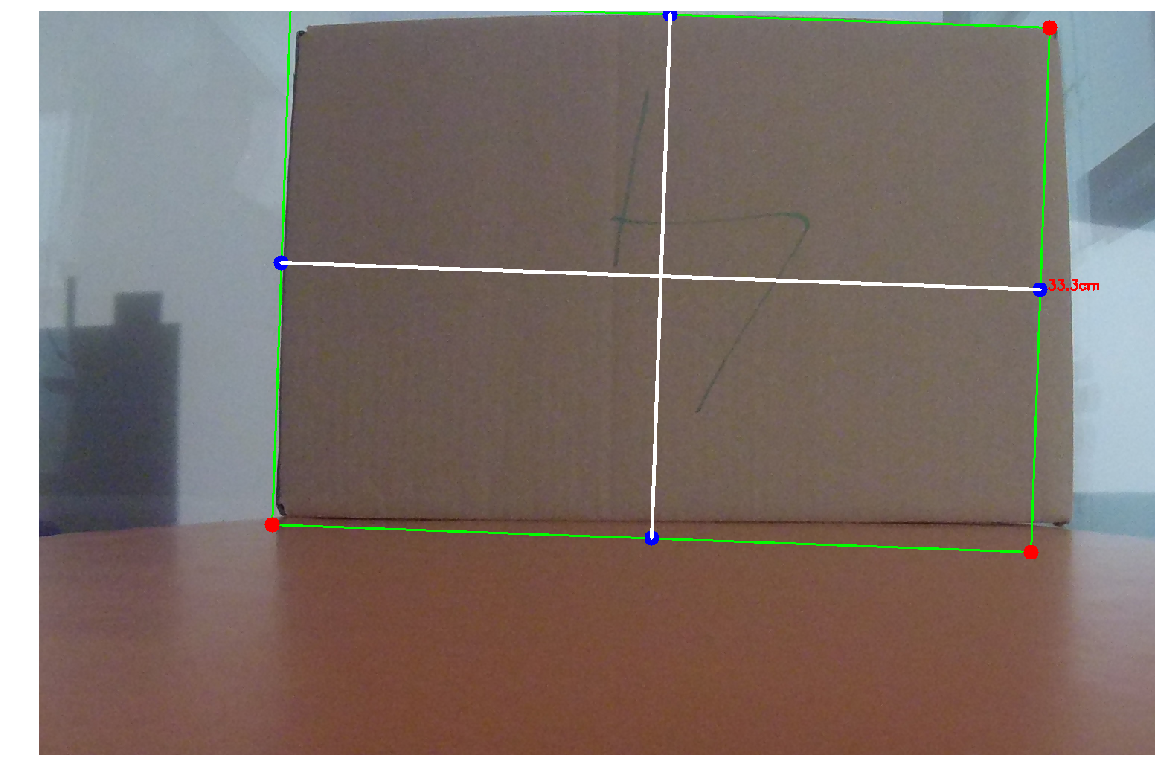

23.0021264209


In [6]:
x = calculatePixelDistance(top, bg_top, top_params['th'], mode='top')
ppm = calculatePpm(x, side_m, side_b)
height = calculateSize(side, bg_side, ppm, side_params['th'])[0][2]
print(height)

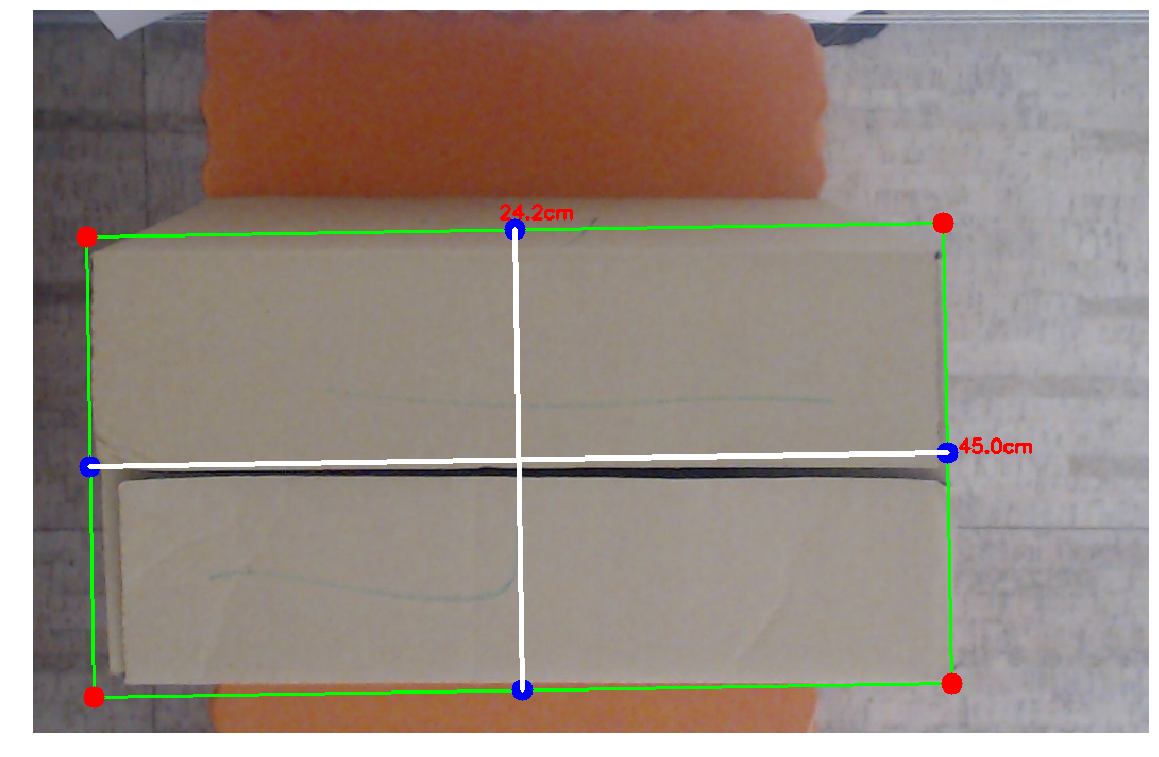

44.9908051247 24.1554991037


In [7]:
x = calculatePixelDistance(side, bg_side, side_params['th'], mode='side')
ppm = calculatePpm(x, top_m, top_b)
vals = calculateSize(top, bg_top, ppm, top_params['th'])

width = vals[0][1]
length = vals[0][2]
print(width, length)

In [8]:
print(length, width, height)

24.1554991037 44.9908051247 23.0021264209


In [9]:
from utils.cttutils import calculateVolumeWeight
volWeight = calculateVolumeWeight(height, width, length, 'Spain')

In [10]:
rounded = round(volWeight,1)
print(rounded)

6.2


(31.604346932840222, -0.028799679334061277, 17.945023426119622, 0.001293059106966016)


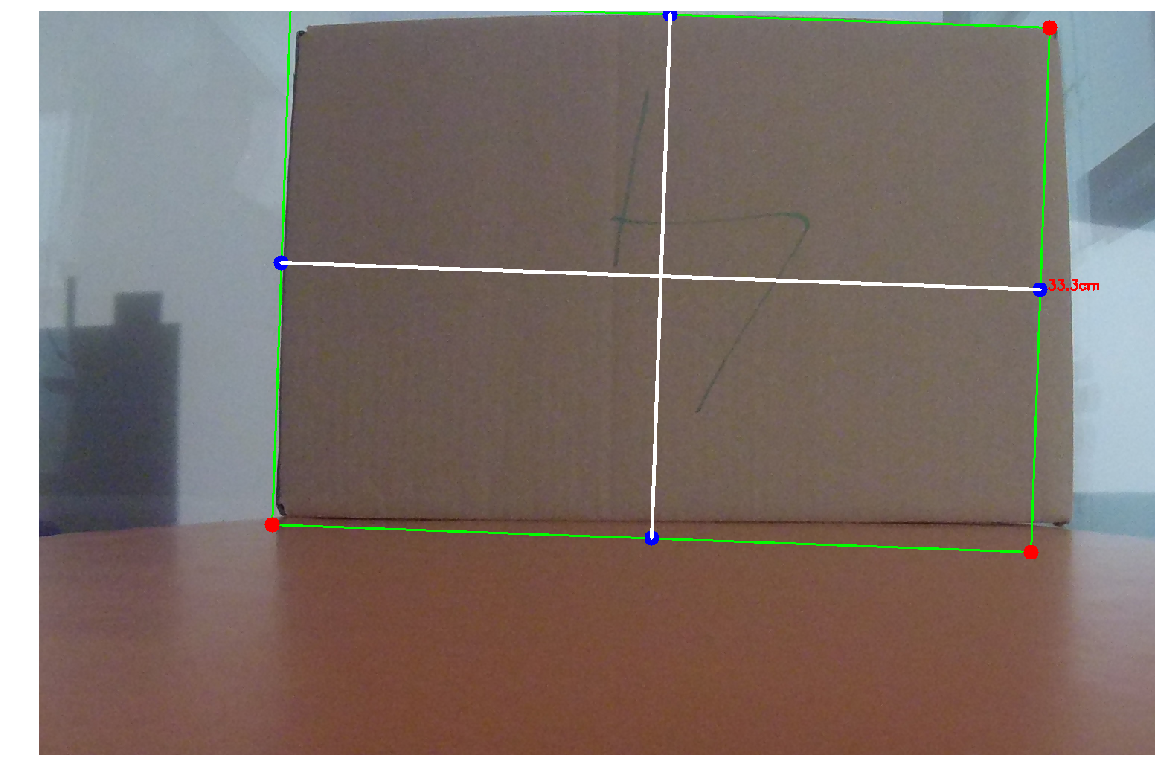

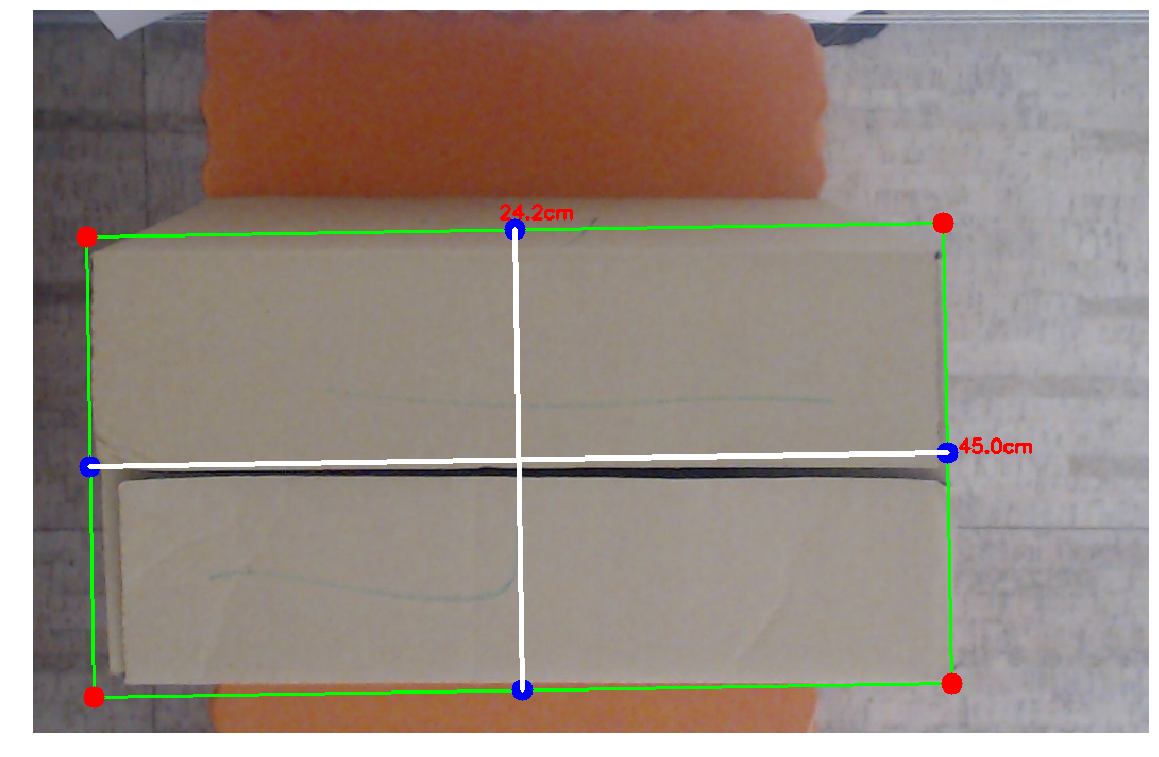

(24.155499103661853, 44.990805124695925, 23.002126420852978)

In [4]:
side = cv2.imread("resources/volumeImages/side4.jpg")
top = cv2.imread("resources/volumeImages/top4.jpg")
getDimensions(side, top)